In [284]:
import numpy as np
import matplotlib.pyplot as plt
import pims

from scipy.ndimage   import gaussian_filter


In [285]:
import numpy as np
DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
movie = 'Control'
#movie = '130721'
#movie ='140721'
#movie ='150721'
#movie ='100621'
MOVIE_PATH = DATA_PATH +  movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'


In [286]:
#datapath = '/mnt/d/Gel_Sheet_Data/sample/T37'
#imseq =pims.ImageSequence(datapath+'/*.tif')

In [287]:
t =5
imseq  = np.load(MOVIE_PATH + 'np/gel_norm.npy')[t]


In [288]:
imseq.shape

(186, 512, 512)

imseq = np.transpose(imseq,(1,2,0))
print(imseq.shape)

In [289]:
im = imseq[0]
print ("plate  shape",im.shape)
imsz = im.shape
im_stack = np.zeros(imsz +(len(imseq),))

for i in range(len(imseq)):
    im_stack[:,:,i] = imseq[i]
print("image stack shape" ,im_stack.shape)

plate  shape (512, 512)
image stack shape (512, 512, 186)


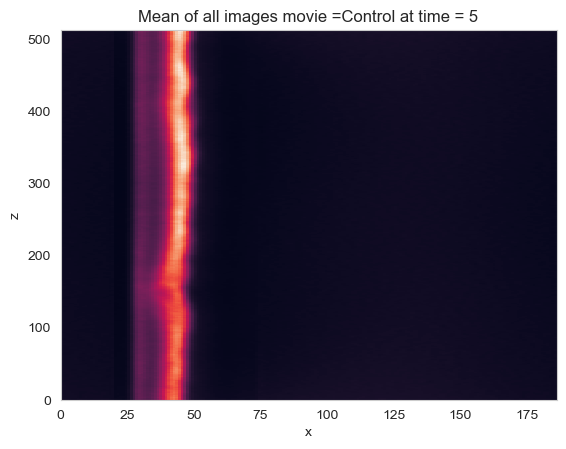

In [290]:
image_mean = np.mean(imseq,axis =2)
plt.pcolormesh(np.transpose(image_mean))
plt.title('Mean of all images movie =%s at time = %d'%(movie,t))
plt.xlabel('x')
plt.ylabel('z')
plt.show()


In [291]:
bg_area = imseq[0:15,:,:]

bg_mean = np.mean(gaussian_filter(bg_area,25))
bg_std = np.std(gaussian_filter(bg_area,25))
gel_values = np.array(imseq[imseq > bg_mean + 3*bg_std])
print (gel_values.min(), gel_values.max())
print('bg mean , std',bg_mean,bg_std)
gel_std = np.std(gel_values)
gel_mean = np.mean(gel_values)
print ('gel mean, std',gel_mean,gel_std)
gel_threshold = (0.1*gel_values.max() + gel_values.min())/bg_mean
print('gel threshold',gel_threshold)
print ("bg stdnormalized", bg_std/bg_mean)


170 1192
bg mean , std 162.34532012939454 2.416132603409504
gel mean, std 235.39374001818854 122.51916138464348
gel threshold 1.7813879683719747
bg stdnormalized 0.01488267479151088


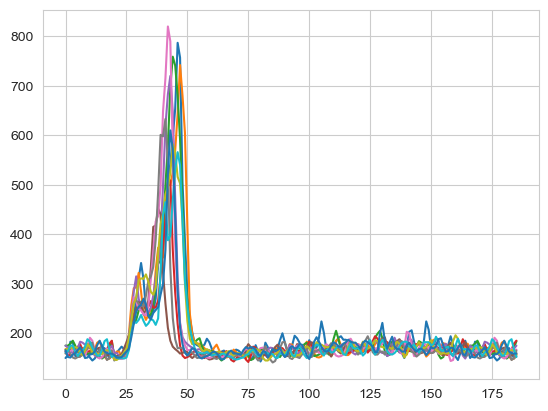

In [292]:

plt.figure()
for i  in range(0,im_stack.shape[1],50):
    plt.plot(im_stack[100,i,:])
plt.show()

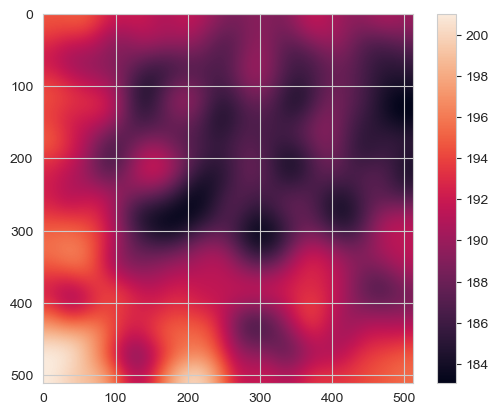

In [293]:
bg = gaussian_filter(np.mean(im_stack[:,:,:],axis = 2),25)
plt.imshow(bg); plt.colorbar()

imstack_bg = np.zeros(im_stack.shape)
for i in range(len(imseq)):
    imstack_bg[:,:,i] = gaussian_filter(im_stack[:,:,i],2)/bg

imstack_bg = np.zeros(im_stack.shape)
for i in range(len(imseq)):
    imstack_bg[i,:,:] = gaussian_filter(im_stack[i,:,:],2)/bg_mean

In [294]:
imstack_norm = np.zeros(im_stack.shape)
for i in range(imseq.shape[1]):
    imstack_norm[i, :, :] = gaussian_filter(im_stack[i, :, :], 2) / bg_mean

plt.figure()
for i  in range(0,imstack_bg.shape[1],50):
    plt.plot(imstack_bg[i,100,:], label = str(i))
plt.legend()

#plt.ylim([0.8,1.2])

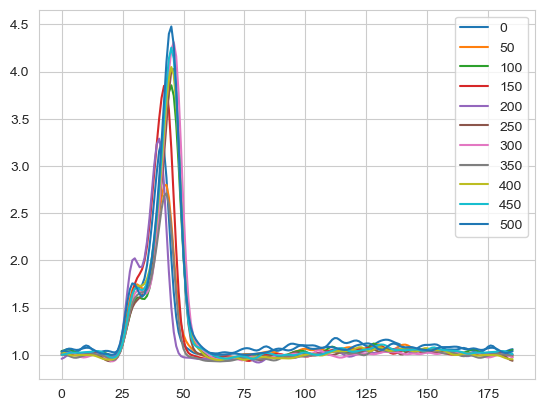

In [295]:
plt.figure()
for i  in range(0,imstack_norm.shape[1],50):
    plt.plot(imstack_norm[i,100,:], label = str(i))
plt.legend()

#plt.ylim([0.8,1.2])

In [296]:
h = np.zeros(im.shape)
for i in range(h.shape[0]):
    for j in range(h.shape[1]):
        try:
            h[i,j] = np.where(imstack_norm[i,j,:]>gel_threshold)[0][-1]
        except:
            h[i,j] = np.nan

In [297]:
h

array([[49., 49., 48., ..., 47., 48., 48.],
       [49., 49., 49., ..., 47., 47., 47.],
       [49., 49., 49., ..., 46., 46., 46.],
       ...,
       [45., 45., 45., ..., 48., 48., 48.],
       [45., 45., 45., ..., 48., 48., 48.],
       [44., 45., 45., ..., 47., 47., 47.]])

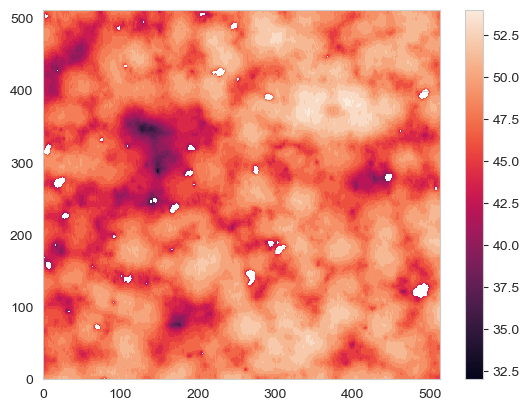

In [298]:
plt.pcolormesh(np.transpose(h))#,vmin =20,vmax=80);
plt.colorbar()


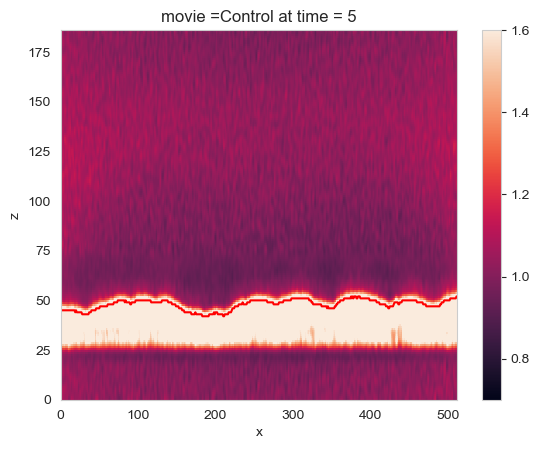

In [299]:
plt.pcolormesh(np.transpose(imstack_norm[:,100,:]));plt.plot(h[:,100],'r')
plt.colorbar()
plt.title('movie =%s at time = %d'%(movie,t))
plt.xlabel('x')
plt.ylabel('z')

#plt.xlim([150,200])
plt.clim([0.7,1.6])
plt.show()
